## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 61  42  68 132 102  79  88  79  11 

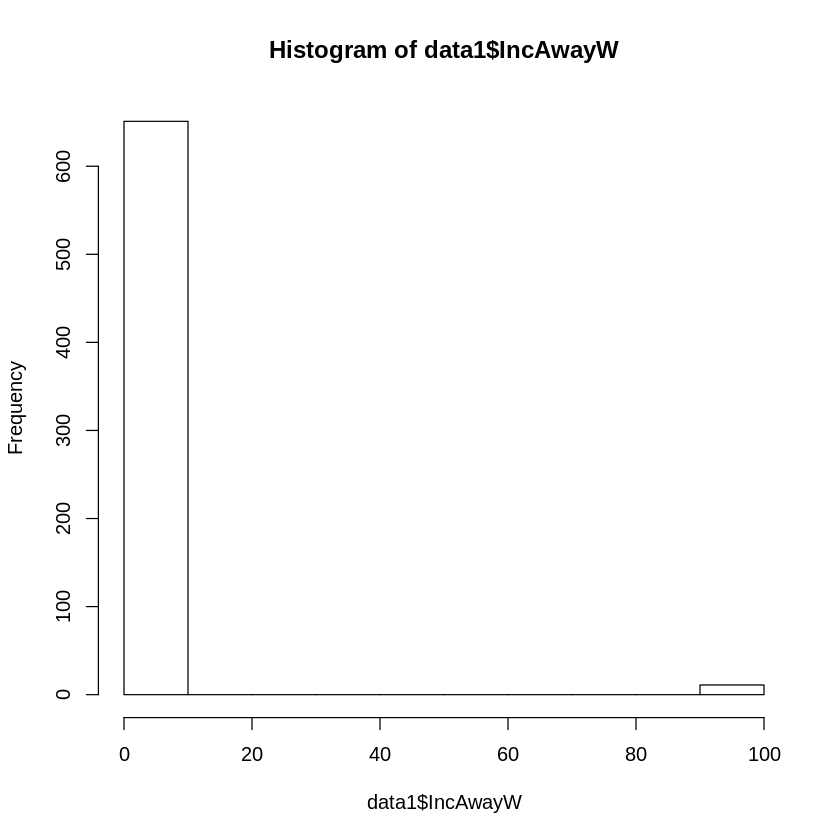

In [6]:
summary(data1$IncAwayW)
table(data1$IncAwayW)
hist(data1$IncAwayW)

In [7]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [8]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 100
[1] 632 100


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 59  40  64 128  97  71  86  76  11 

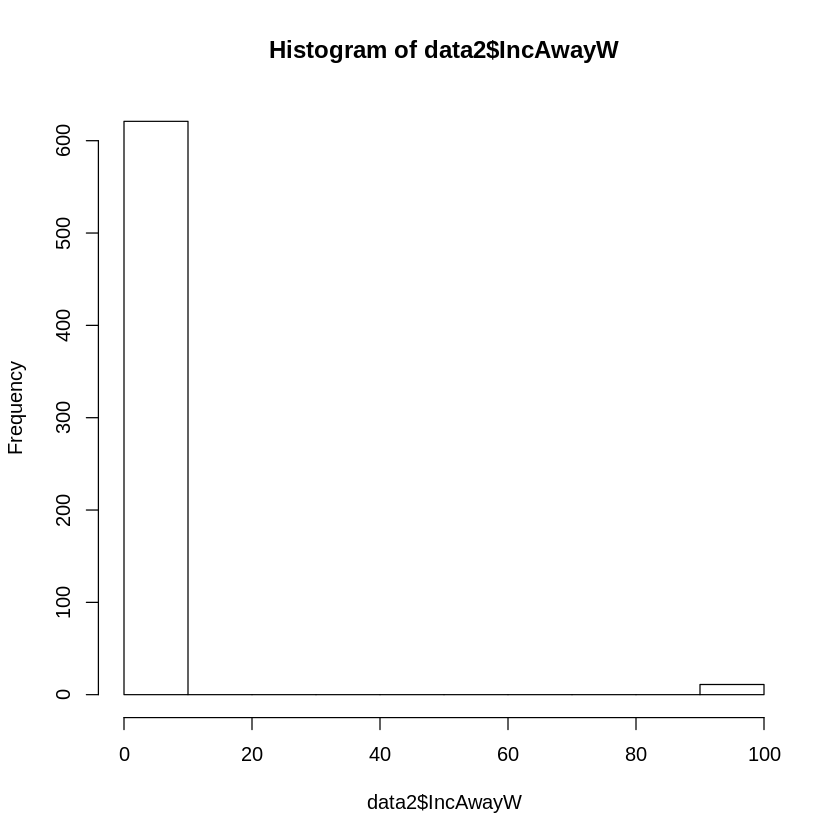

In [9]:
summary(data2$IncAwayW)
table(data2$IncAwayW)
hist(data2$IncAwayW)

In [10]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
 [61] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
 [66] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [71] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [76] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [81] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [86] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [91] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
 [96] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

In [11]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Winter_avg",     
"HomeW")

In [12]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
 [61] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
 [66] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [71] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [76] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [81] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [86] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [91] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
 [96] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeW"      "HouseholdS" "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "PBC"        "Political"  "SN"         "SqftCate"  
[21] "SubNorm"    "Trust"      "Winter_avg"

In [13]:
data1 <- data2[, which(names(data2) %in% c("IncAwayW",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "IncAwayW"   "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "Political"  "SN"         "SqftCate"   "SubNorm"    "Winter_avg"

In [14]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [15]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [16]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncAwayW"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "EnergyC"    "MC"         "ComfNS"     "Atti"      
[16] "SubNorm"    "SN"         "HabitG"     "HabitC"     "Winter_avg"

In [17]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [18]:
hiCor(data2,.7)

,Latitude,Winter_avg
Latitude,1.00,0.82
Winter_avg,0.82,1.00


In [19]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1   -0.42 -0.34 -0.44   -0.37 -0.23  -0.32  -0.28
[1] 0.25
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.34    -0.5    -0.52      -0.28  -0.43
[1] 0.34
    Latitude ComfNS Winter_avg
PC3    -0.65   0.21      -0.65
[1] 0.41
      Age Gender HouseholdS Ethnic  Educ HabitC
PC4 -0.21   0.37       0.55  -0.27 -0.45  -0.27
[1] 0.48
    Political Ethnic Income  Educ EnergyC   MC HabitG HabitC
PC5     -0.53   0.23  -0.22 -0.39   -0.24 0.21   0.42   0.29
[1] 0.53
     Age Gender Ethnic Income ComfNS    SN
PC6 0.47    0.4   0.41  -0.22   0.36 -0.28
[1] 0.59
    OwnRent Ethnic  Educ ComfNS SubNorm    SN
PC7    0.21  -0.26 -0.26  -0.56    -0.4 -0.48
[1] 0.63
    IncAwayW Gender HabitG
PC8    -0.89  -0.24   0.24
[1] 0.68
      Age HouseholdS Political Ethnic EnergyC   MC    SN HabitC
PC9 -0.38       0.25     -0.21   0.31    0.21 0.45 -0.35  -0.37
[1] 0.72
     IncAwayW Gender Ethnic Income    MC ComfNS Winter_avg
PC10    -0.27   0

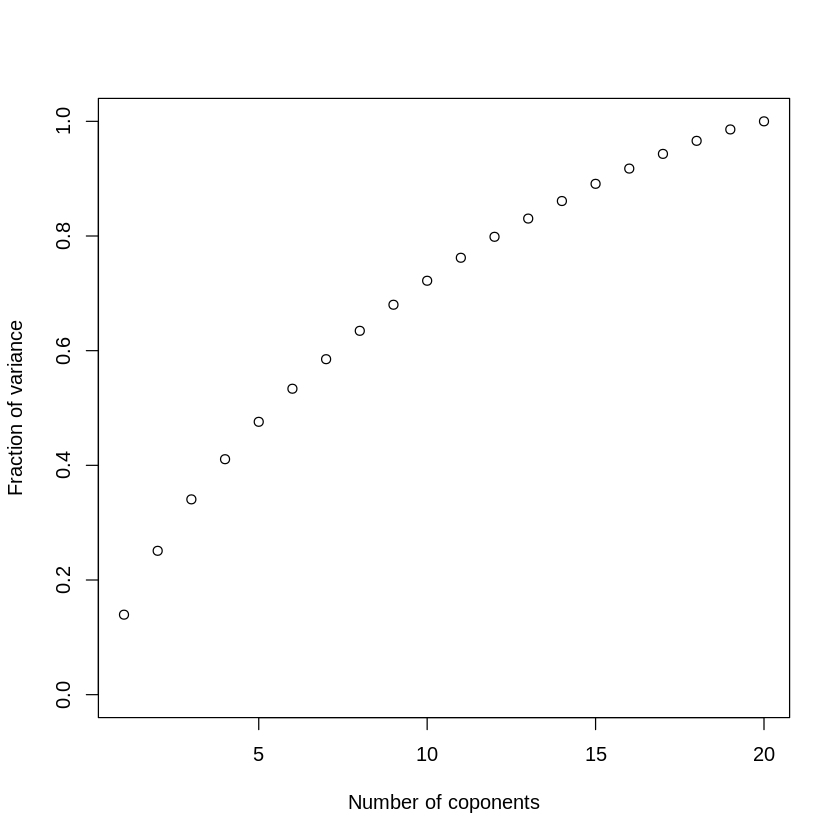

In [20]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [21]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [22]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Latitude,11,0.51
Winter_avg,20,0.51
Atti,15,0.42
EnergyC,12,0.39
SqftCate,5,0.36
OwnRent,4,0.31
Income,9,0.26
HouseholdS,6,0.25
SubNorm,16,0.25
MC,13,0.22
HabitG,18,0.22


In [23]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [24]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Winter_avg')

In [25]:
fmla <- as.formula(paste("IncAwayW",paste(IndepPred,collapse="+"),sep="~"));

In [26]:
table(data2[,"IncAwayW"])


  1   2   3   4   5   6   7   8  99 
 59  40  64 128  97  71  86  76  11 

In [27]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-11.40  -3.55  -1.56   0.67  92.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  15.6368     6.6037    2.37    0.018 *
Age           0.0581     0.0496    1.17    0.242  
Gender       -0.5922     1.0564   -0.56    0.575  
OwnRent      -0.9569     1.1520   -0.83    0.406  
SqftCate     -0.6697     0.5569   -1.20    0.230  
HouseholdS    0.0987     0.4725    0.21    0.835  
Political    -0.7229     0.6503   -1.11    0.267  
Ethnic        1.3243     1.3607    0.97    0.331  
Income        0.5156     0.2922    1.76    0.078 .
Educ         -0.6707     0.4841   -1.39    0.166  
Latitude     -0.1314     0.1377   -0.95    0.340  
EnergyC      -0.2847     0.4001   -0.71    0.477  
MC           -0.1101     0.4940   -0.22    0.824  
ComfNS       -0.3379     0.3538   -0.96    0.340  
HabitC        0.5677     0.3687    1.54    0.124  
Winter_avg   -0.9229     0.9334   -0.99    0.

In [28]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-15.73  -5.21  -2.06   0.53  88.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  32.9370    15.7554    2.09    0.038 *
Age          -0.0324     0.1024   -0.32    0.752  
Gender       -1.6916     2.1416   -0.79    0.430  
OwnRent      -2.3828     2.2813   -1.04    0.297  
SqftCate     -0.8781     1.1261   -0.78    0.436  
HouseholdS    0.1469     0.8910    0.16    0.869  
Political     0.3328     1.3599    0.24    0.807  
Ethnic        1.8934     2.5103    0.75    0.451  
Income        0.8819     0.5719    1.54    0.124  
Educ         -0.0907     0.9881   -0.09    0.927  
Latitude     -0.2492     0.3148   -0.79    0.429  
EnergyC      -1.2556     0.8284   -1.52    0.131  
MC           -1.0111     1.0586   -0.96    0.340  
ComfNS       -0.7437     0.7123   -1.04    0.297  
HabitC        1.0101     0.7402    1.36    0.174  
Winter_avg   -3

In [29]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-10.18  -2.64  -0.46   1.52  86.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1.0111     8.5689   -0.12   0.9061   
Age           0.1233     0.0445    2.77   0.0059 **
Gender       -0.0611     0.9719   -0.06   0.9499   
OwnRent       1.0943     1.0912    1.00   0.3166   
SqftCate     -0.9043     0.5072   -1.78   0.0755 . 
HouseholdS    0.2889     0.4620    0.63   0.5321   
Political    -1.2463     0.5841   -2.13   0.0336 * 
Ethnic        1.1350     1.3781    0.82   0.4107   
Income        0.1287     0.2741    0.47   0.6390   
Educ         -1.0138     0.4393   -2.31   0.0216 * 
Latitude      0.0154     0.1867    0.08   0.9343   
EnergyC       0.4455     0.3601    1.24   0.2169   
MC            0.6559     0.4369    1.50   0.1342   
ComfNS        0.1476     0.3317    0.44   0.6566   
HabitC        0.3364     0.3410    0.99   0.3246   

In [30]:
#17 states with highest winter average temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.587 -1.331 -0.057  1.744  3.898 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   5.1730     3.1422    1.65    0.103  
Age           0.0244     0.0188    1.30    0.197  
Gender        0.3539     0.4374    0.81    0.420  
OwnRent       0.1299     0.4858    0.27    0.790  
SqftCate     -0.3234     0.2264   -1.43    0.156  
HouseholdS    0.1693     0.2047    0.83    0.410  
Political    -0.0528     0.2611   -0.20    0.840  
Ethnic        1.2172     0.6553    1.86    0.066 .
Income       -0.1229     0.1247   -0.99    0.327  
Educ         -0.0781     0.2053   -0.38    0.705  
Latitude     -0.0667     0.0507   -1.32    0.191  
EnergyC       0.0865     0.1666    0.52    0.605  
MC           -0.0355     0.2140   -0.17    0.869  
ComfNS        0.3538     0.1392    2.54    0.013 *
HabitC       -0.16

In [32]:
#17 middle states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-14.33  -2.94  -0.65   1.97  81.65 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -6.9427    11.1499   -0.62   0.5343   
Age           0.1778     0.0678    2.62   0.0094 **
Gender       -0.6324     1.4067   -0.45   0.6536   
OwnRent       1.3735     1.5542    0.88   0.3780   
SqftCate     -0.8434     0.7316   -1.15   0.2504   
HouseholdS   -0.1357     0.6675   -0.20   0.8391   
Political    -1.3723     0.8356   -1.64   0.1022   
Ethnic        0.9170     1.9330    0.47   0.6358   
Income        0.0940     0.3990    0.24   0.8140   
Educ         -1.4928     0.6150   -2.43   0.0161 * 
Latitude      0.1498     0.2221    0.67   0.5010   
EnergyC       0.5557     0.5012    1.11   0.2690   
MC            0.9641     0.6009    1.60   0.1103   
ComfNS       -0.3783     0.4857   -0.78   0.4370   
Hab

In [34]:
#bottom 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-13.25  -5.26  -2.32   0.03  91.71 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  25.2766    12.5580    2.01    0.045 *
Age           0.0179     0.0919    0.19    0.846  
Gender       -0.7339     1.9607   -0.37    0.708  
OwnRent      -2.4002     2.1466   -1.12    0.264  
SqftCate     -0.9117     1.0305   -0.88    0.377  
HouseholdS    0.5229     0.8359    0.63    0.532  
Political    -0.1373     1.2319   -0.11    0.911  
Ethnic        2.0604     2.3568    0.87    0.383  
Income        0.8778     0.5237    1.68    0.095 .
Educ         -0.2216     0.9177   -0.24    0.809  
Latitude     -0.2745     0.2617   -1.05    0.295  
EnergyC      -1.0795     0.7659   -1.41    0.160  
MC           -0.7485     0.9538   -0.78    0.433  
ComfNS       -0.5509     0.6670   -0.83    0.409  
HabitC        0.80

In [35]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,25.3,25.3,0.099,0.754
Gender,1,188.9,188.9,0.737,0.391
OwnRent,1,327.6,327.6,1.278,0.259
SqftCate,1,2.9,2.9,0.011,0.915
HouseholdS,1,29.4,29.4,0.115,0.735
Political,1,162.1,162.1,0.632,0.427
Ethnic,1,179.8,179.8,0.701,0.403
Income,1,799.2,799.2,3.119,0.078
Educ,1,14.6,14.6,0.057,0.811
Latitude,1,320.1,320.1,1.249,0.265


In [36]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncAwayW        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.99       0.99       0.92       1.00       1.00       0.99       0.94 
    Ethnic     Income       Educ   Latitude    EnergyC         MC     ComfNS 
      0.97       0.99       0.98       0.31       0.52       0.79       0.95 
      Atti    SubNorm         SN     HabitG     HabitC Winter_avg 
      0.42       0.76       0.92       0.85       0.90       0.28 

Loadings:
           Factor1 Factor2
EnergyC     0.69          
Atti        0.76          
Latitude            0.83  
Winter_avg          0.85  
IncAwayW                  
Age                       
Gender                    
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          0.44          
ComfNS                    
SubNorm

In [168]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + EnergyC + Age + Ethnic + MC + 
    Political + Educ, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.422 -1.111 -0.151  0.985  4.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.38581    0.59224    4.03  6.3e-05 ***
ComfNS       0.37014    0.04774    7.75  3.7e-14 ***
EnergyC     -0.09642    0.05315   -1.81  0.07016 .  
Age          0.02134    0.00617    3.46  0.00058 ***
Ethnic      -0.42435    0.18204   -2.33  0.02007 *  
MC          -0.05075    0.06598   -0.77  0.44208    
Political    0.09324    0.08700    1.07  0.28426    
Educ         0.00636    0.06230    0.10  0.91875    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 619 degrees of freedom
Multiple R-squared:  0.126,	Adjusted R-squared:  0.116 
F-statistic: 12.7 on 7 and 619 DF,  p-value: 2.73e-15


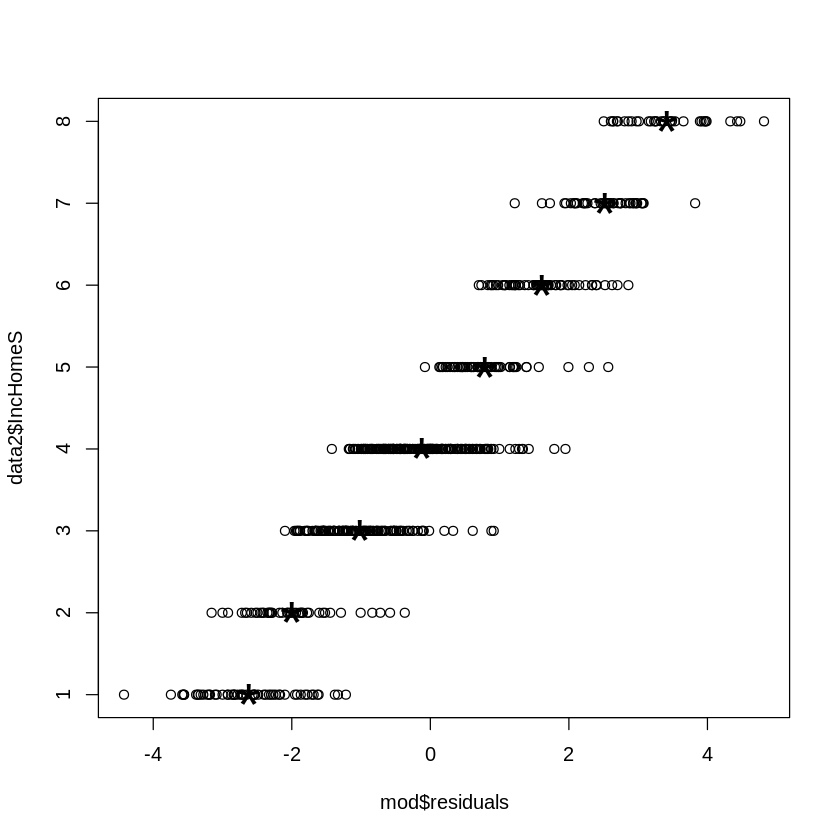

In [169]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [170]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.76  -1.08  -0.18   1.02   4.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53248    0.31962    4.79  2.0e-06 ***
ComfNS       0.37397    0.04712    7.94  9.7e-15 ***
Age          0.01922    0.00612    3.14   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 624 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.107 
F-statistic: 38.6 on 2 and 624 DF,  p-value: <2e-16


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

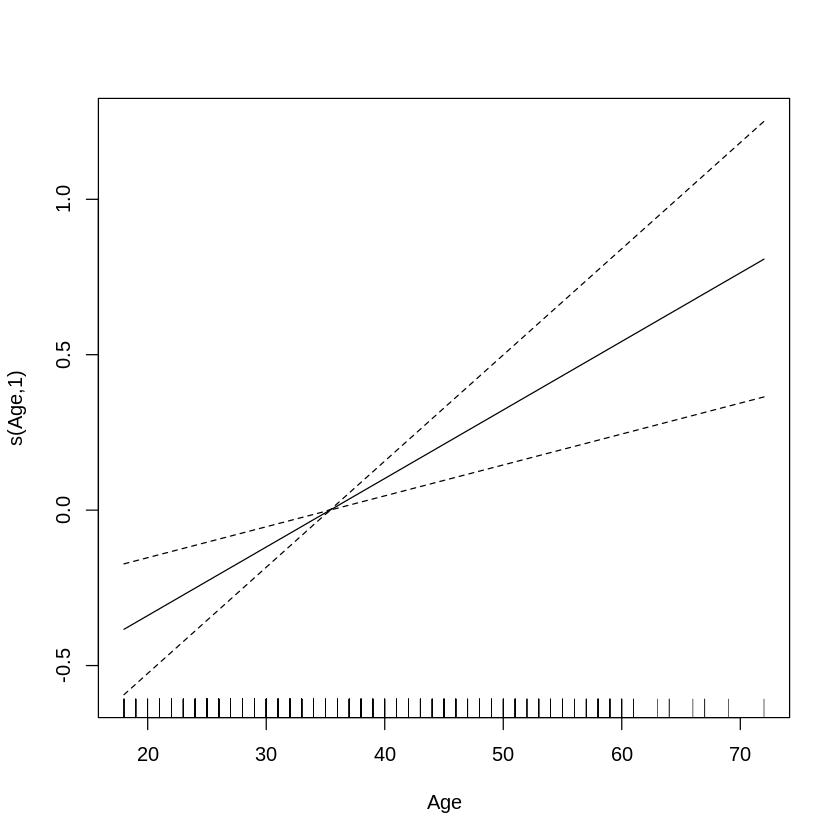

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



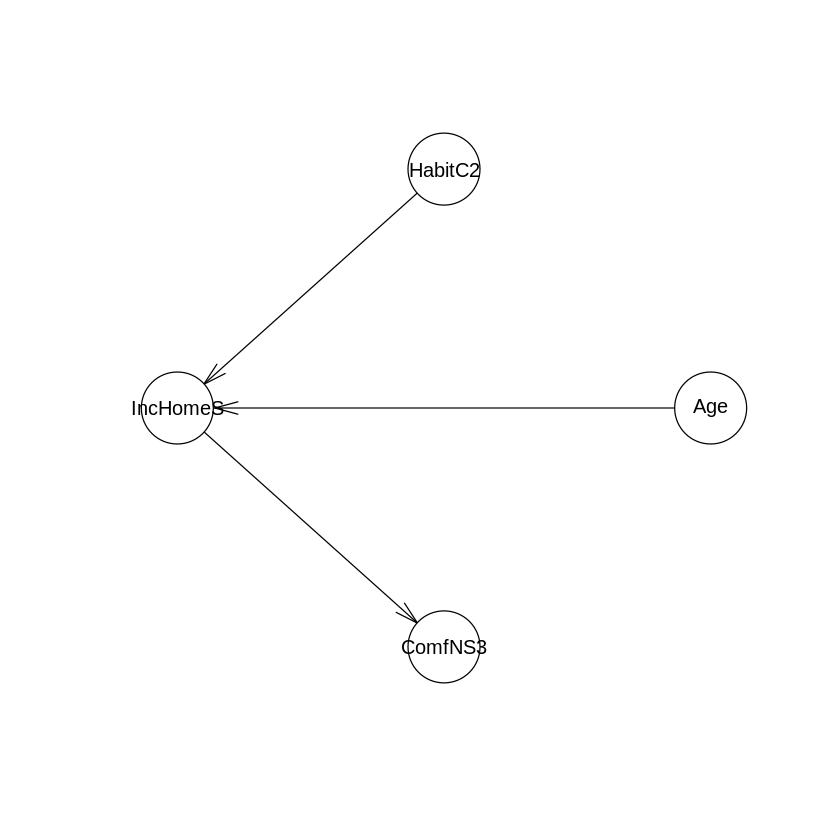

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

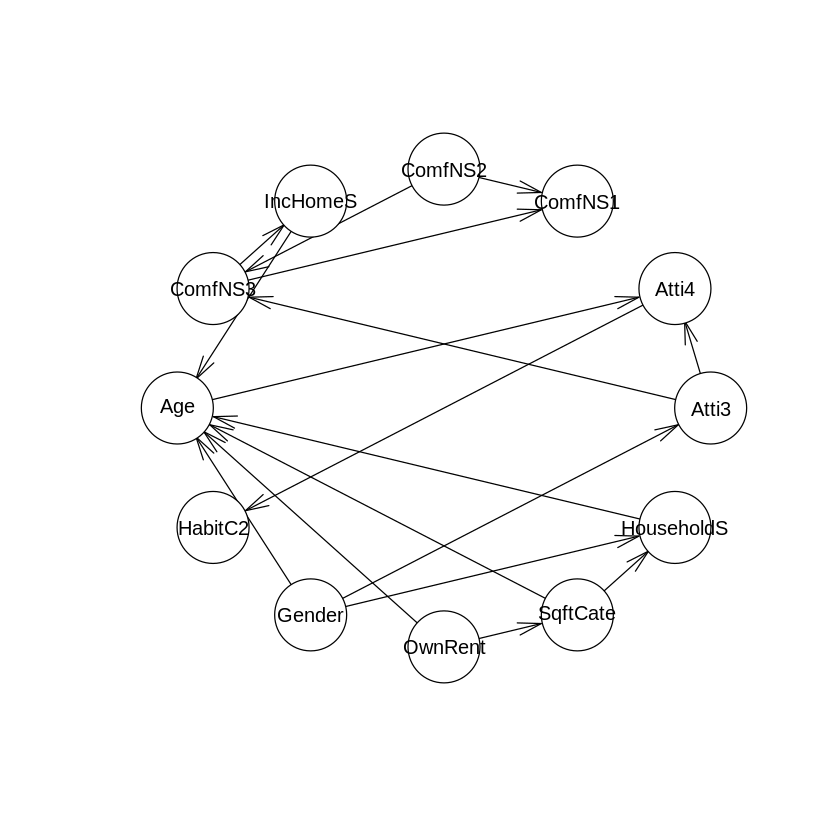

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)